# Validating the data set

Since the data set that Prashin sent us is not identical to the one used in the paper, we can just recalculate the results and compare to the results presented in the paper to see if the argument still holds.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

THETA_BINS = 16

plt.style.use("https://raw.githubusercontent.com/simon-ast/matplotlib-plot-style/main/corner_style.mplstyle")

In [2]:
def binned_statistics(data, theta_bins, weight_id):
    nbins = theta_bins
    bins = np.linspace(-180, 180, nbins + 1)
    bin_assignment = np.digitize(data["theta"], bins=bins)

    mean_mx = []
    mean_my = []
    for idx in range(1, nbins + 1):
        assign = np.where(bin_assignment == idx)
        subsample_frame = data.iloc[assign]
        
        #print(f"Stars in subframe {idx}: {subsample_frame.shape[0]}")

        if weight_id is not None:
            idx_mean_mx = np.average(
                subsample_frame["mu_x"],
                weights=subsample_frame[weight_id]
            )
            idx_mean_my = np.average(
                subsample_frame["mu_y"],
                weights=subsample_frame[weight_id]
            )

        else:
            idx_mean_mx = np.average(subsample_frame["mu_x"])
            idx_mean_my = np.average(subsample_frame["mu_y"])

        mean_mx.append(idx_mean_mx)
        mean_my.append(idx_mean_my)

    bin_centres = (bins[:-1] + bins[1:]) / 2.

    return bin_centres, np.array(mean_mx), np.array(mean_my)


def plot_arrows(axis, data, label, n_bins, colour, r0=0.30, weight_id=None):
    theta_points, mean_mx, mean_my = binned_statistics(data, n_bins, weight_id)

    r_sample = r0
    axis.quiver(
        r_sample * np.cos(np.deg2rad(theta_points)),
        r_sample * np.sin(np.deg2rad(theta_points)),
        mean_mx, mean_my,
        color=colour,
        scale=1.1,
        zorder=100,
        label=label
    )
    
    theta_points, mean_mx, mean_my

In [3]:
new_data = pd.read_csv("univariate_results.csv")
#new_data = new_data.rename(columns={'pm_X': 'mu_x', 'pm_Y': 'mu_y'})
new_data.columns

Index(['ID', 'x_1', 'y_1', 'U', 'sigma_U', 'N_U', 'B', 'sigma_B', 'N_B', 'V',
       'sigma_V', 'N_V', 'R', 'sigma_R', 'N_R', 'I', 'sigma_I', 'N_I', 'chi',
       'sharp', 'vary', 'wt', 'ra_1', 'dec_1', 'cc', 'sigma_cc', 'source_id',
       'ra_2', 'dec_2', 'x_2', 'y_2', 'plx', 'pmra', 'pmdec', 'plxe', 'pmrae',
       'pmdece', 'pmcorr', 'g_mag', 'bp_rp', 'qflag', 'memberprob', 'x', 'y',
       'mu_x', 'mu_y', 'r', 'theta', 'mu_r', 'mu_t', 'Del_CUBI',
       'Del_CUBI_sigma', 'p_p1', 'p_p2'],
      dtype='object')

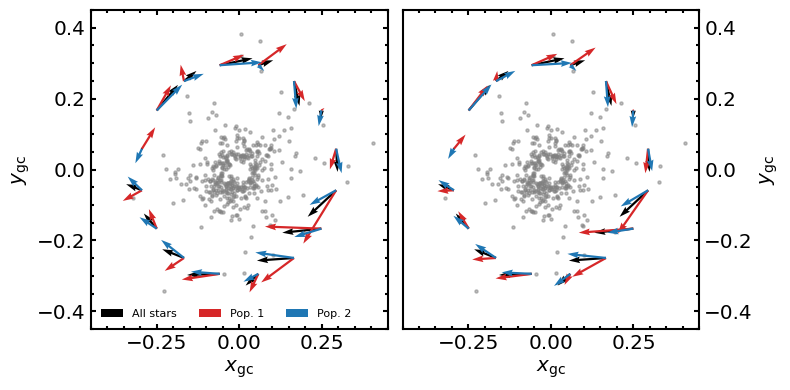

In [4]:
newpop_1 = new_data.loc[new_data["Del_CUBI"] < 0.45]
newpop_2 = new_data.loc[new_data["Del_CUBI"] >= 0.45]

fig, (ax, ax_prob) = plt.subplots(figsize=(8, 4), ncols=2)

# First plot the stars in cluster coordinates
ax.scatter(new_data["x"], new_data["y"], s=5, c="grey", alpha=0.5)
ax.set(xlim=(-0.45, 0.45), ylim=(-0.45, 0.45), xlabel="$x_\\mathrm{gc}$", ylabel="$y_\\mathrm{gc}$")

# Now plot kinematics as arrows
_ = plot_arrows(ax, new_data, "All stars", 16, "k")
hc_p1 = plot_arrows(ax, newpop_1, "Pop. 1", 16, "tab:red")
hc_p2 = plot_arrows(ax, newpop_2, "Pop. 2", 16, "tab:blue")

ax.legend(prop={'size': 8}, ncols=3)

# Now results from probabilistic model
ax_prob.scatter(new_data["x"], new_data["y"], s=5, c="grey", alpha=0.5)
ax_prob.set(xlim=(-0.45, 0.45), ylim=(-0.45, 0.45))
ax_prob.set(xlim=(-0.45, 0.45), ylim=(-0.45, 0.45), xlabel="$x_\\mathrm{gc}$", ylabel="$y_\\mathrm{gc}$")
ax_prob.yaxis.tick_right()
ax_prob.yaxis.set_label_position('right')

# Now plot kinematics as arrows
_ = plot_arrows(ax_prob, new_data, "All stars", 16, "k")
prob_p1 = plot_arrows(ax_prob, new_data, "Pop. 1", 16, "tab:red", weight_id="p_p1")
prob_p2 = plot_arrows(ax_prob, new_data, "Pop. 2", 16, "tab:blue", weight_id="p_p2")

fig.tight_layout()
fig.savefig("kinematics_initialdata_method-comparison.png", dpi=600)

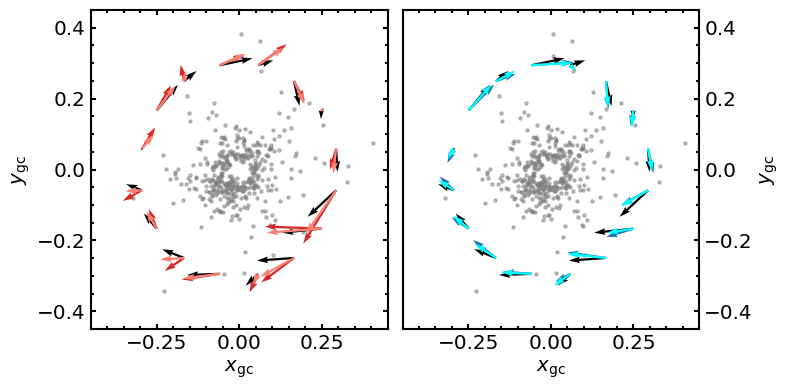

In [5]:
fig, (ax_p1, ax_p2) = plt.subplots(figsize=(8, 4), ncols=2)

# Population 1
ax_p1.scatter(new_data["x"], new_data["y"], s=5, c="grey", alpha=.5)
ax_p1.set(xlim=(-0.45, 0.45), ylim=(-0.45, 0.45), xlabel="$x_\\mathrm{gc}$", ylabel="$y_\\mathrm{gc}$")

plot_arrows(ax_p1, new_data, "All stars", THETA_BINS, "k")
plot_arrows(ax_p1, newpop_1, "Pop. 1", THETA_BINS, "tab:red")
plot_arrows(ax_p1, new_data, "Pop. 1", THETA_BINS, "salmon", weight_id="p_p1")

# Now results from probabilistic model
ax_p2.scatter(new_data["x"], new_data["y"], s=5, c="grey", alpha=0.5)
ax_p2.set(xlim=(-0.45, 0.45), ylim=(-0.45, 0.45), xlabel="$x_\\mathrm{gc}$", ylabel="$y_\\mathrm{gc}$")
ax_p2.yaxis.tick_right()
ax_p2.yaxis.set_label_position('right')

plot_arrows(ax_p2, new_data, "All stars", THETA_BINS, "k")
plot_arrows(ax_p2, newpop_2, "Pop. 2", THETA_BINS, "tab:blue")
plot_arrows(ax_p2, new_data, "Pop. 2", THETA_BINS, "cyan", weight_id="p_p2")

fig.tight_layout()
fig.savefig("kinematics_initialdata_pop-comparison.png", dpi=600)